# Importing Libraries

In [ ]:
# Loading required libraries
import pandas as pd
import keras
from keras.datasets import mnist 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns


# Loading the Dataset

The MNIST database consists of 28x28 pixel grayscale images of handwritten numbers that range from 0 to 9. Each image has a label of the digit it represents. It is divided into a training set with 60,000 images and a test set with 10,000 images. 

In [ ]:
mnist_df = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# Loading the dataset

(X_train,y_train), (X_test,y_test) = mnist.load_data()

print("Training Data: {}".format(X_train.shape))
print("Training Labels: {}".format(y_train.shape))
print("Testing Data: {}".format(X_test.shape))
print("Testing Labels: {}".format(y_test.shape))


Training Data: (60000, 28, 28)
Training Labels: (60000,)
Testing Data: (10000, 28, 28)
Testing Labels: (10000,)


### Sample iamges

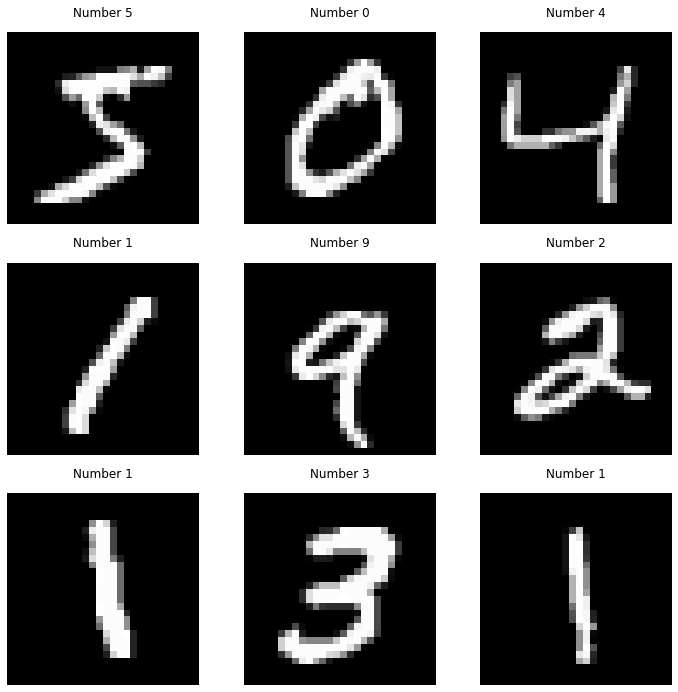

In [ ]:
# Displaying images
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

for i, ax in enumerate(axs.flat):
  ax.matshow(X_train[i])
  ax.axis("off")
  ax.set_title("Number {}".format(y_train[i]))

fig.show()

# Data Preprocessing


In [ ]:
# Normalization

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train = X_train/255.0
X_test = X_test/255.0

### Reshaping the images

In [ ]:
# Reshaping the data from a 3 dimensional array to a 2 dimensional array

X = X_train.reshape(len(X_train),-1)
X_test = X_test.reshape(len(X_test),-1)
print(X.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Elbow-Curve Method

In [ ]:
# Elbow Curve for k range 1-100, with increments of 10
Sum_of_squared_distances = []
K = range(1,100,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(X)
 Sum_of_squared_distances.append(kmeans.inertia_)


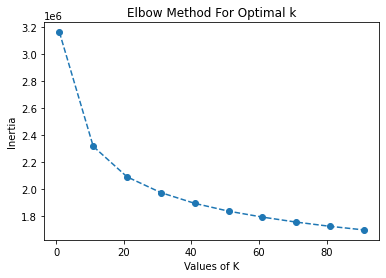

In [ ]:
plt.plot(K,Sum_of_squared_distances,marker = "o", linestyle = "dashed")
plt.xlabel("Values of K") 
plt.ylabel("Inertia") 
plt.title("Elbow Method For Optimal k")
plt.show()

# K-Means Clustering

In [ ]:
#Using 20 as K
kmeans_20 = KMeans(20)
kmeans_20.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

### Assigning Labels


In [ ]:
def infer_cluster_labels(kmeans_20, actual_labels):


    inferred_labels_20 = {}

    for i in range(kmeans_20.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans_20.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels_20:
            # append the new number to the existing array at this slot
            inferred_labels_20[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels_20[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels_20  

def infer_data_labels(X_labels, cluster_labels):
        
    # empty array of len(X)
    predicted_labels_20 = np.zeros(len(X_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(X_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels_20[i] = key
                
    return predicted_labels_20


### Predicted vs Actual

In [ ]:
#Predicted vs Actual 

cluster_labels = infer_cluster_labels(kmeans_20, y_train)
X_clusters = kmeans_20.predict(X)
predicted_labels_20 = infer_data_labels(X_clusters, cluster_labels)
print("Predicted Labels: ", predicted_labels_20[:20])
print("Actual Lables:    ", y_train[:20])

Predicted Labels:  [3 0 4 1 9 2 1 3 1 5 3 5 3 6 1 7 2 8 6 7]
Actual Lables:     [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


### Model Accuracy

In [ ]:
from sklearn import metrics
score_20 = metrics.accuracy_score(predicted_labels_20,y_train)
score_20

0.7075

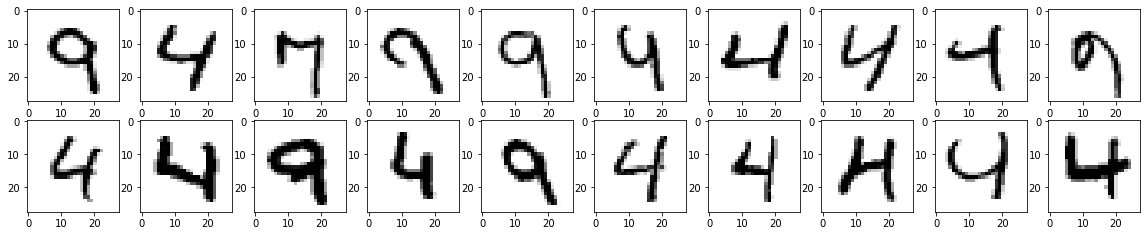

In [ ]:
y = y_train
k_means_labels = kmeans_20.labels_

G = len(np.unique(k_means_labels)) #Number of labels

#2D matrix  for an array of indexes of the given label
cluster_index= [[] for i in range(G)]
for i, label in enumerate(k_means_labels,0):
    for n in range(G):
        if label == n:
            cluster_index[n].append(i)
        else:
            continue
plt.figure(figsize=(20,20));
clust = 1 #enter label number to visualise
num = 21 #num of data to visualize from the cluster

for i in range(1,num): 
   plt.subplot(10, 10, i); #(Number of rows, Number of column per row, item number)
   plt.imshow(X[cluster_index[clust][i+500]].reshape(X_train.shape[1], X_train.shape[2]), cmap = plt.cm.binary);
    
plt.show("Cluster ")

### Test Set

In [ ]:
# Fitting model on test test

cluster_labels = infer_cluster_labels(kmeans_20, y_train)

test_clusters = kmeans_20.predict(X_test)
predicted_labels = infer_data_labels(kmeans_20.predict(X_test), cluster_labels)
    
# calculate and print accuracy
print('Accuracy: {}\n'.format(metrics.accuracy_score(y_test, predicted_labels)))


Accuracy: 0.7133



# Visualizing Cluster Centroids

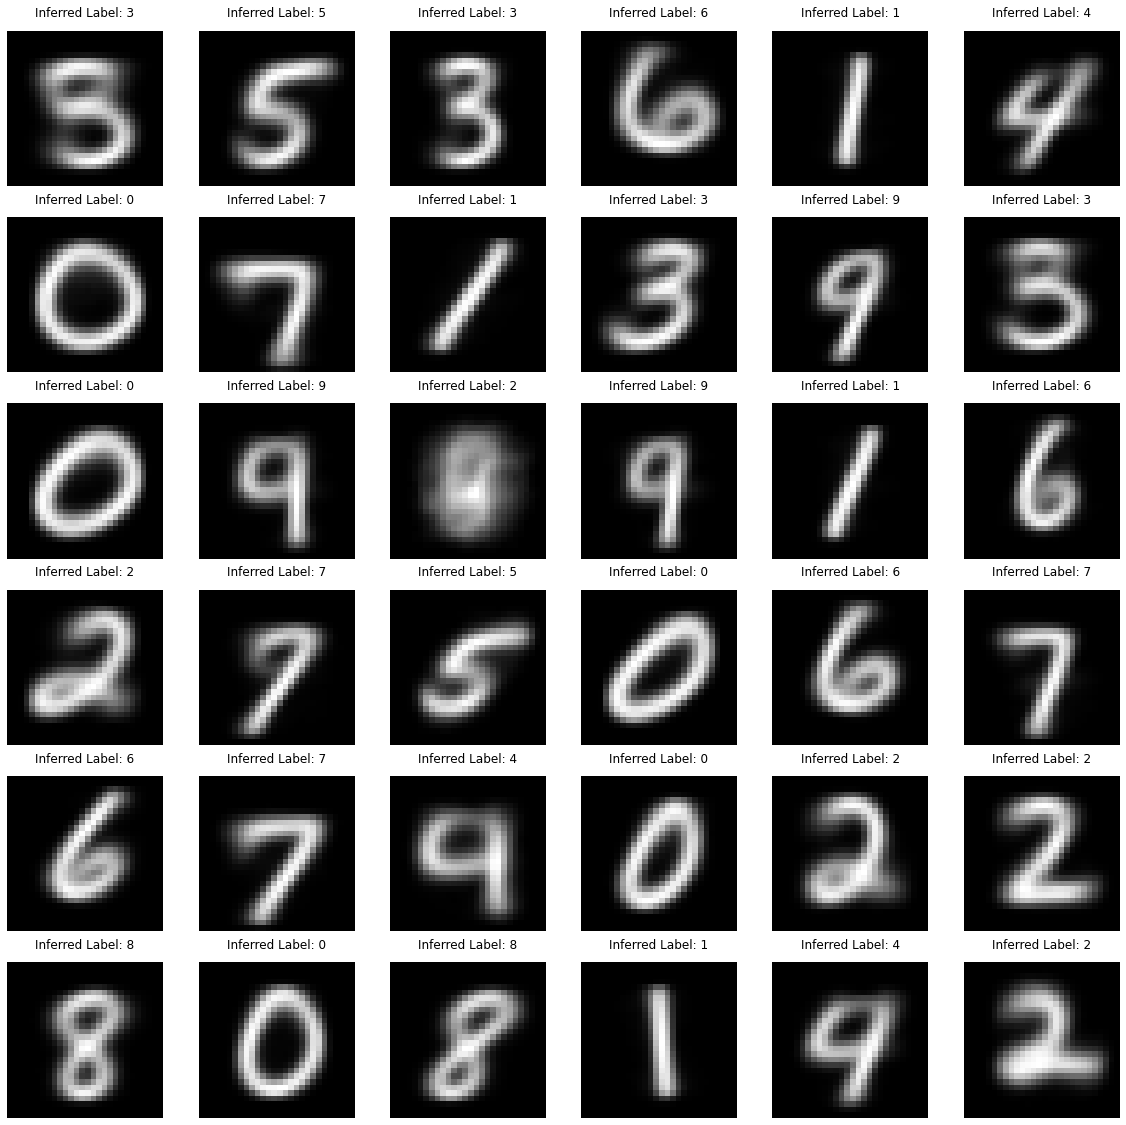

In [ ]:
kmeans = KMeans(n_clusters = 36)
kmeans.fit(X)


centroids = kmeans.cluster_centers_

# reshape centroids into images
images = centroids.reshape(36, 28, 28)
images *= 255
images = images.astype(np.uint8)

# determine cluster labels
cluster_labels = infer_cluster_labels(kmeans, y_train)

# create figure with subplots using matplotlib.pyplot
fig, axs = plt.subplots(6, 6, figsize = (20, 20))
plt.gray()

# loop through subplots and add centroid images
for i, ax in enumerate(axs.flat):
    
    # determine inferred label using cluster_labels dictionary
    for key, value in cluster_labels.items():
        if i in value:
            ax.set_title('Inferred Label: {}'.format(key))
    
    # add image to subplot
    ax.matshow(images[i])
    ax.axis('off')
    
# display the figure
fig.show()


# 2D plot using TSNE

In [ ]:
from sklearn.manifold import TSNE
colors = sns.color_palette("pastel")
tsne = TSNE(n_components = 2, random_state=0)
tsne_res = tsne.fit_transform(X)



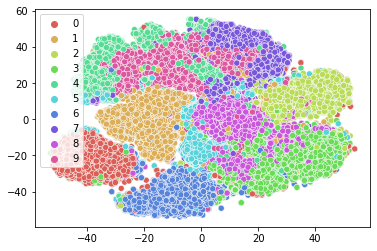

In [ ]:
sns.scatterplot(x = tsne_res[:,0], y = tsne_res[:,1], hue = predicted_labels_20, 
                palette = sns.hls_palette(10), legend = 'full')

# PCA (Principle Component Analysis)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(150)

pca.fit(X) #fit the data according to our PCA instance
print("Number of components before PCA  = " + str(X.shape[1]))
print("Number of components after PCA = " + str(pca.n_components_))

Number of components before PCA  = 784
Number of components after PCA = 150


In [ ]:
Clus_dataSet = pca.transform(X)
print("Dimension of our data after PCA = " + str(Clus_dataSet.shape))

Dimension of our data after PCA = (60000, 150)


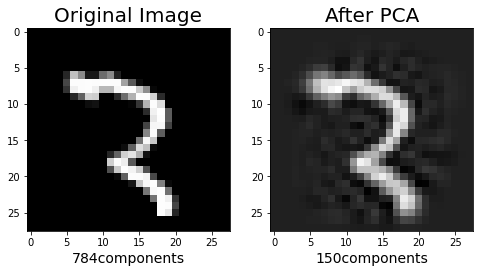

In [ ]:
approximation = pca.inverse_transform(Clus_dataSet)

plt.figure(figsize=(8,4));
n = 500 

# Original Image
plt.subplot(1, 2, 1);
plt.imshow(X[n].reshape(X_train.shape[1], X_train.shape[2]),
 cmap = plt.cm.gray,);
plt.xlabel(str(X.shape[1])+ "components", fontsize = 14)
plt.title("Original Image", fontsize = 20);

# principal components
plt.subplot(1, 2, 2);
plt.imshow(approximation[n].reshape(X_train.shape[1], X_train.shape[2]),
 cmap = plt.cm.gray,);
plt.xlabel(str(Clus_dataSet.shape[1]) + "components", fontsize = 14)
plt.title("After PCA", fontsize = 20);


### K-Means clustering on PCA-reduced dataset

In [ ]:
kmeans_pca = KMeans(20)
kmeans_pca.fit(Clus_dataSet)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
def infer_cluster_labels_pca(kmeans_pca, actual_labels):
    """
    Associates most probable label with each cluster in KMeans model
    returns: dictionary of clusters assigned to each label
    """

    inferred_labels_pca = {}

    for i in range(kmeans_pca.n_clusters):

        # find index of points in cluster
        labels = []
        index = np.where(kmeans_pca.labels_ == i)

        # append actual labels for each point in cluster
        labels.append(actual_labels[index])

        # determine most common label
        if len(labels[0]) == 1:
            counts = np.bincount(labels[0])
        else:
            counts = np.bincount(np.squeeze(labels))

        # assign the cluster to a value in the inferred_labels dictionary
        if np.argmax(counts) in inferred_labels_pca:
            # append the new number to the existing array at this slot
            inferred_labels_pca[np.argmax(counts)].append(i)
        else:
            # create a new array in this slot
            inferred_labels_pca[np.argmax(counts)] = [i]

        #print(labels)
        #print('Cluster: {}, label: {}'.format(i, np.argmax(counts)))
        
    return inferred_labels_pca  

def infer_data_labels_pca(Clus_dataSet_labels, cluster_labels):
    """
    Determines label for each array, depending on the cluster it has been assigned to.
    returns: predicted labels for each array
    """
        
    # empty array of len(X)
    predicted_labels_pca = np.zeros(len(Clus_dataSet_labels)).astype(np.uint8)
    
    for i, cluster in enumerate(Clus_dataSet_labels):
        for key, value in cluster_labels.items():
            if cluster in value:
                predicted_labels_pca[i] = key
                
    return predicted_labels_pca

### Predicted vs Actual

In [ ]:
#Predicted vs Actual 

cluster_labels_2 = infer_cluster_labels_pca(kmeans_pca, y_train)
Clus_dataSet_clusters = kmeans_pca.predict(Clus_dataSet)
predicted_labels_pca = infer_data_labels_pca(Clus_dataSet_clusters, cluster_labels_2)
print("Predicted Labels: ", predicted_labels_pca[:20])
print("Actual Lables:    ", y_train[:20])

Predicted Labels:  [3 0 4 1 9 2 1 3 1 5 3 5 3 6 1 7 2 8 6 7]
Actual Lables:     [5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]


### Model Accuracy

In [ ]:
score_pca = metrics.accuracy_score(predicted_labels_pca, y_train)
score_pca

0.71255

### Visualizing

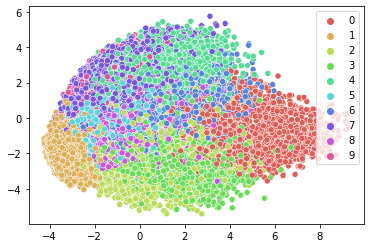

In [ ]:
sns.scatterplot(x = Clus_dataSet[:,0], y = Clus_dataSet[:,1], 
                hue = predicted_labels_pca, palette = sns.hls_palette(10), legend = 'full')